In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer_data = pd.DataFrame(load_breast_cancer()["data"])

In [6]:
cancer_data["target"] = load_breast_cancer()["target"]

In [7]:
cancer_data

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Train Test Split

In [15]:
X = cancer_data.drop("target", axis = 1).values
y = cancer_data["target"].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Scale the Data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scalar = MinMaxScaler()

In [20]:
X_train = scalar.fit_transform(X_train)

In [21]:
X_test = scalar.transform(X_test)

### Model Development

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

In [23]:
early_Stop = EarlyStopping(monitor="val_loss", mode="min", verbose=3, patience=25)

In [24]:
pwd

'/Users/berkatbhatti/Desktop/python/Portfolio/Deep Learning and Neural Networks'

### We will set the the log events for tensorboard

## if we are running this model with different parameters and want a different directory for the logs add  time stamp

In [25]:
from datetime import datetime

In [26]:
datetime.now().strftime("%Y-%m-%d-%--%H%M")

'2020-04-22--1355'

In [33]:
log_dir = "logs/fit"
board = TensorBoard( log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

In [34]:
X_train.shape

(398, 30)

In [35]:
model = Sequential()
model.add(Dense(units = 30, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimization = "adam", loss = 'binary_crossentropy')

In [36]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=300, callbacks=[early_Stop,board])

Train on 398 samples, validate on 171 samples
Epoch 1/300
398/398 [==============================] - 3s 7ms/sample - loss: 0.7118 - val_loss: 0.6886
Epoch 2/300
398/398 [==============================] - 0s 411us/sample - loss: 0.7012 - val_loss: 0.6855
Epoch 3/300
398/398 [==============================] - 0s 415us/sample - loss: 0.6856 - val_loss: 0.6810
Epoch 4/300
398/398 [==============================] - 0s 415us/sample - loss: 0.6905 - val_loss: 0.6788
Epoch 5/300
398/398 [==============================] - 0s 420us/sample - loss: 0.6828 - val_loss: 0.6752
Epoch 6/300
398/398 [==============================] - 0s 414us/sample - loss: 0.6704 - val_loss: 0.6710
Epoch 7/300
398/398 [==============================] - 0s 415us/sample - loss: 0.6630 - val_loss: 0.6631
Epoch 8/300
398/398 [==============================] - 0s 417us/sample - loss: 0.6717 - val_loss: 0.6621
Epoch 9/300
398/398 [==============================] - 0s 421us/sample - loss: 0.6568 - val_loss: 0.6523
Epoch 10/30

Epoch 78/300
398/398 [==============================] - 0s 417us/sample - loss: 0.2665 - val_loss: 0.2486
Epoch 79/300
398/398 [==============================] - 0s 409us/sample - loss: 0.2488 - val_loss: 0.2468
Epoch 80/300
398/398 [==============================] - 0s 413us/sample - loss: 0.2401 - val_loss: 0.2421
Epoch 81/300
398/398 [==============================] - 0s 413us/sample - loss: 0.2666 - val_loss: 0.2457
Epoch 82/300
398/398 [==============================] - 0s 412us/sample - loss: 0.2535 - val_loss: 0.2440
Epoch 83/300
398/398 [==============================] - 0s 415us/sample - loss: 0.2173 - val_loss: 0.2555
Epoch 84/300
398/398 [==============================] - 0s 415us/sample - loss: 0.2462 - val_loss: 0.2468
Epoch 85/300
398/398 [==============================] - 0s 413us/sample - loss: 0.2434 - val_loss: 0.2421
Epoch 86/300
398/398 [==============================] - 0s 414us/sample - loss: 0.2370 - val_loss: 0.2459
Epoch 87/300
398/398 [========================

#### Performnce

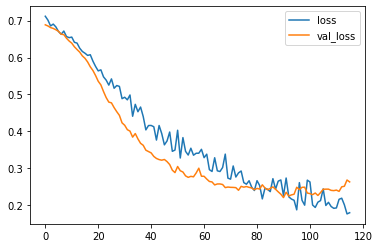

In [37]:
pd.DataFrame(model.history.history).plot()

In [41]:
predictions = model.predict_classes(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

### Model has a 96% accuracy

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        66
           1       0.96      0.97      0.97       105

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [44]:
print(confusion_matrix(y_test, predictions))

[[ 62   4]
 [  3 102]]


## lets pass in random new features to check if the model will predict accurately

In [77]:
from random import randint
random_index = randint(0,len(cancer_data))

new_feature = cancer_data.drop("target", axis =1).iloc[random_index]
new_feature

0       21.610000
1       22.280000
2      144.400000
3     1407.000000
4        0.116700
5        0.208700
6        0.281000
7        0.156200
8        0.216200
9        0.066060
10       0.624200
11       0.920900
12       4.158000
13      80.990000
14       0.005215
15       0.037260
16       0.047180
17       0.012880
18       0.020450
19       0.004028
20      26.230000
21      28.740000
22     172.000000
23    2081.000000
24       0.150200
25       0.571700
26       0.705300
27       0.242200
28       0.382800
29       0.100700
Name: 393, dtype: float64

In [78]:
new = scalar.transform(new_feature.values.reshape(1,30))

In [79]:
model.predict_classes(new)

array([[0]], dtype=int32)

### WE can inspect this by passing in the random index in to the dataFrame. We can see that our model predicted correctly

In [80]:
cancer_data.iloc[random_index]["target"]

0.0

In [81]:
pwd

'/Users/berkatbhatti/Desktop/python/Portfolio/Deep Learning and Neural Networks'